In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from configuration import *

from spikeinterface.sortingcomponents.benchmark.benchmark_motion_correction import BenchmarkMotionCorrectionMearec
from spikeinterface.sortingcomponents.benchmark.benchmark_motion_correction import plot_distances_to_static


In [15]:
figure_folder = base_folder / 'figures' / 'correction'
figure_folder.mkdir(exist_ok=True, parents=True)

ext = 'png'
# ext = 'pdf'

## impact on sorting accuracy

In [16]:
correction_cases = [
    ('uniform', 'homogeneous', 'rigid'),
    ('uniform', 'homogeneous', 'non-rigid'),
    ('uniform', 'homogeneous', 'bumps'),
]

interpolation_method = 'kriging'

In [17]:
benchmarks = {}
for cells_position, cells_rate, drift_mode  in correction_cases:
    benchmark_folder = base_folder / 'bench_correction' / f'{probename}_{drift_mode}_{cells_position}_{cells_rate}' / f'{interpolation_method}'
    bench = BenchmarkMotionCorrectionMearec.load_from_folder(benchmark_folder)
    benchmarks[(cells_position, cells_rate, drift_mode)] = bench    

### ordered accuracies

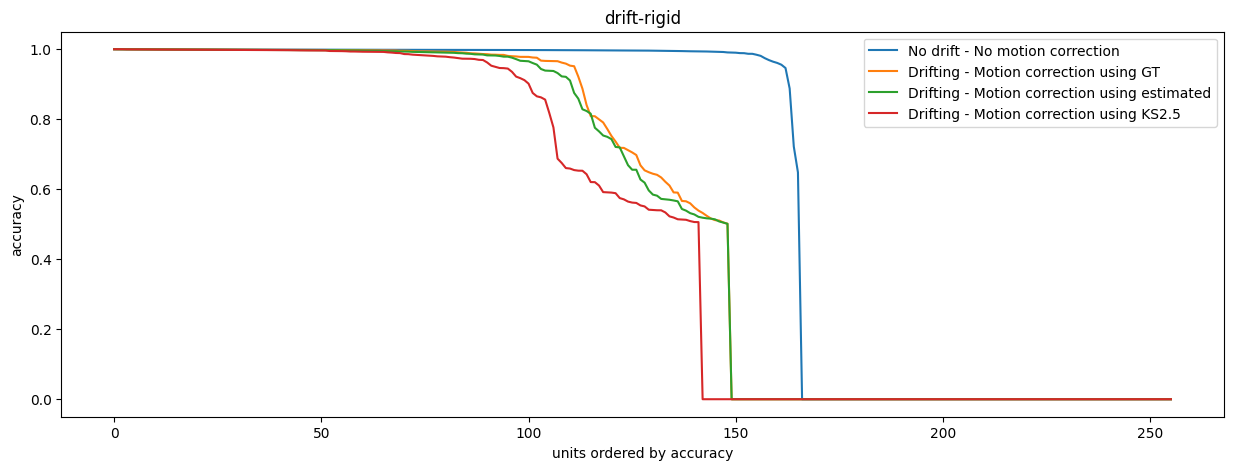

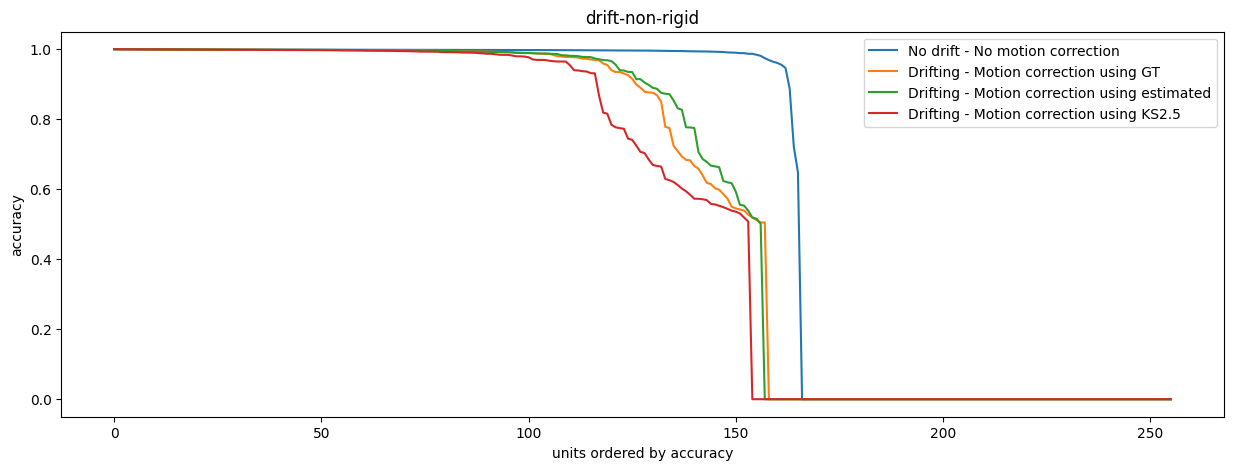

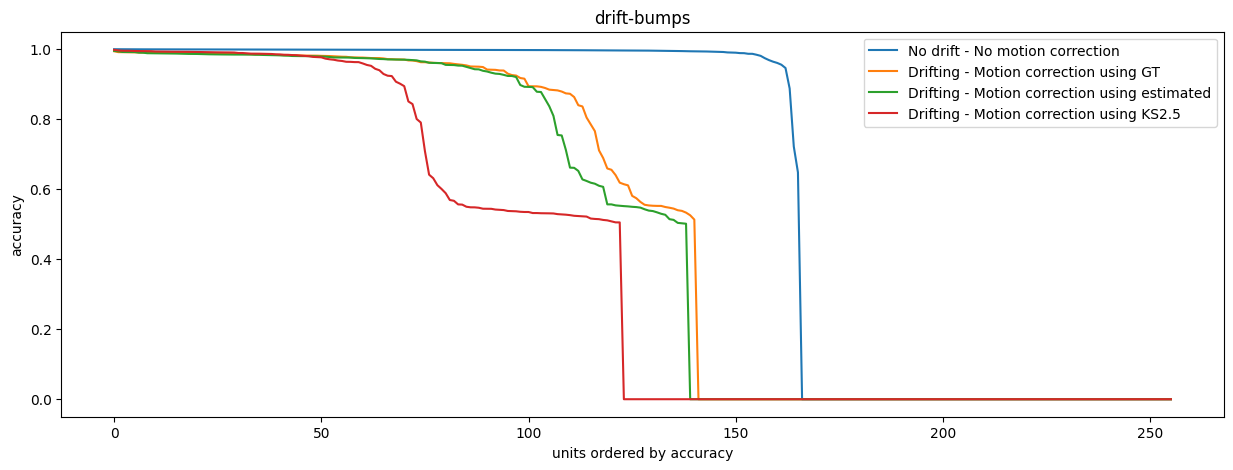

In [18]:
for key, bench in benchmarks.items():
    fig = bench.plot_sortings_accuracy(mode='ordered_accuracy')
    name = f'drift-{key[-1]}'
    fig.axes[0].set_title(name)
    fig.savefig(figure_folder / f'OrderedAccuracy_{name}.{ext}')

# bench.plot_sortings_accuracy(mode='depth_snr')
# bench.plot_sortings_accuracy(mode='snr')
# bench.plot_sortings_accuracy(mode='depth')



### accuracies by detph and snr

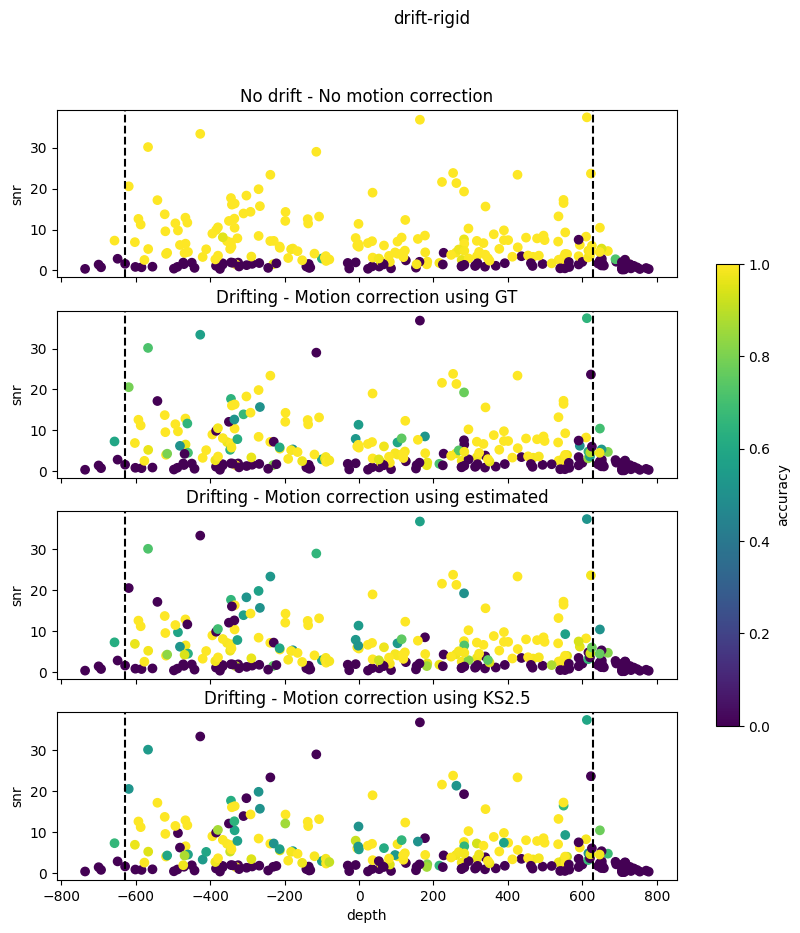

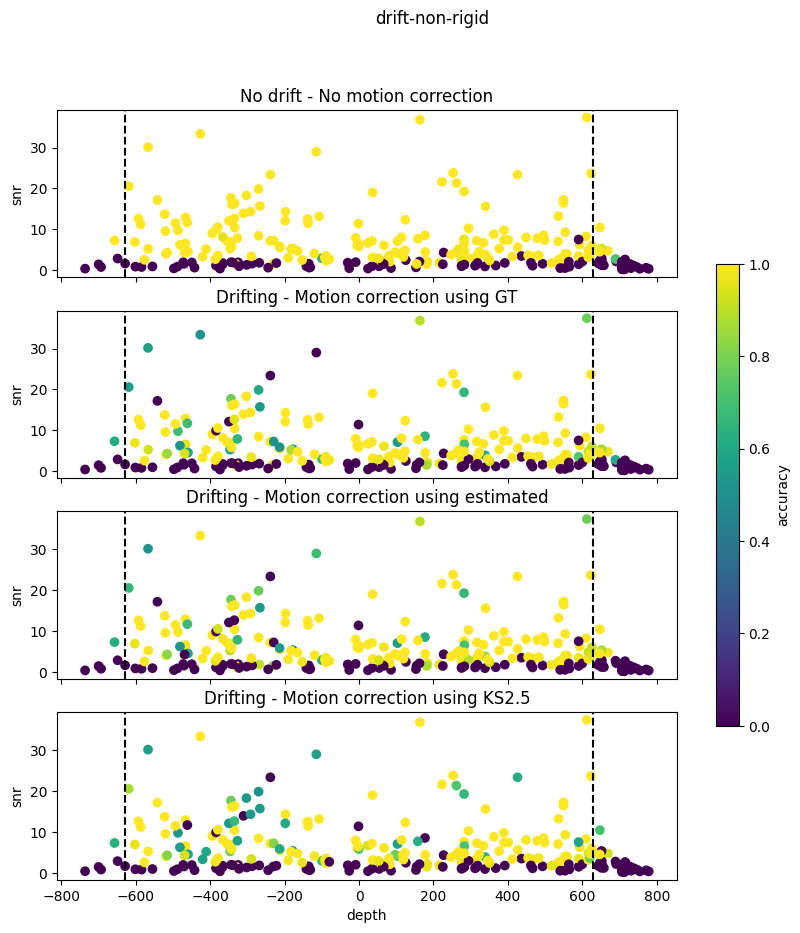

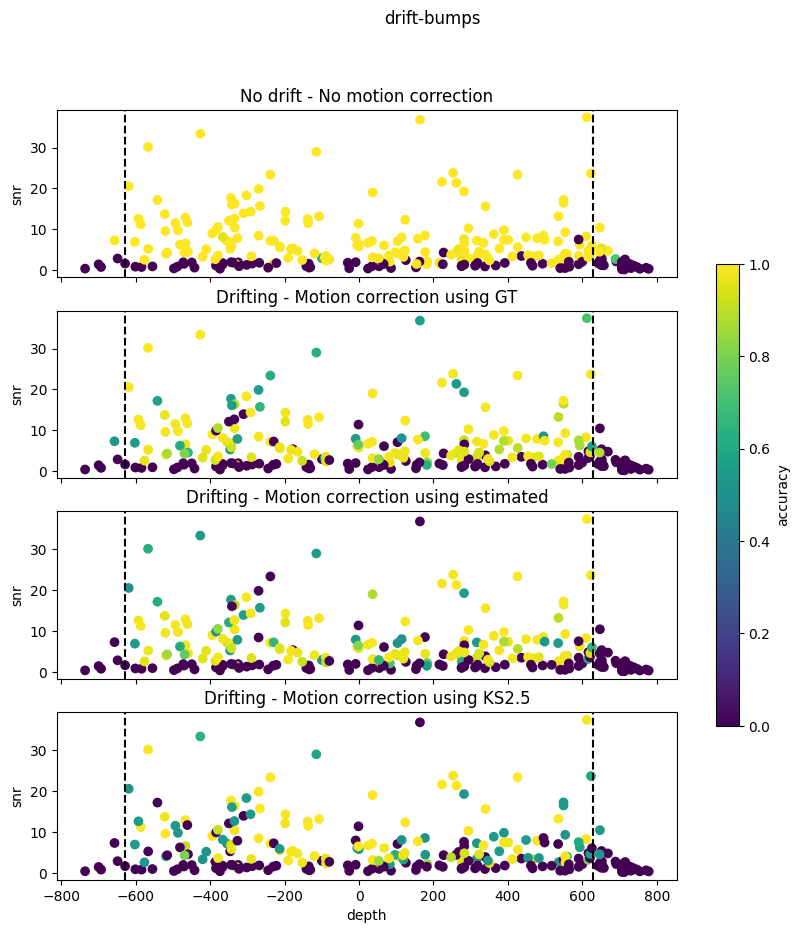

In [24]:
for key, bench in benchmarks.items():
    fig = bench.plot_sortings_accuracy(mode='depth_snr', figsize=(10, 10))
    name = f'drift-{key[-1]}'
    fig.suptitle(name)
    fig.savefig(figure_folder / f'AccuracyByDepthSnr_{name}.{ext}')
